# Data Exploration, Pre-processing and Wrangling

BITS F464 Assignment 1

### Installing and Importing Dependencies

In [4]:
# %pip install -q numpy
# %pip install -q pandas
# %pip install -q matplotlib
# %pip install -q seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

### Task 2

In [6]:
# Task 2
df = pd.read_csv('./data/housing.csv');

print("Number of rows: ",df.shape[0]);

df.head()

Number of rows:  20640


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


### Task 3

In [7]:
print("Descriptive Statistics: \n")
print(df.describe())
print("\nMean: \n")
print(df.mean(numeric_only=True))
print("\nMedian: \n")
print(df.median(numeric_only=True))
print("\nMode: \n")
print(df.mode(numeric_only=True))

Descriptive Statistics: 

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.4999

### Task 4

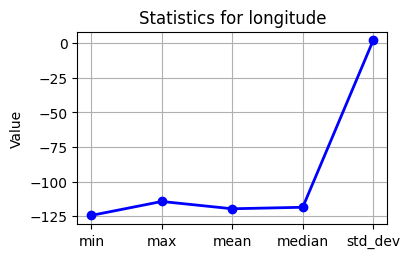

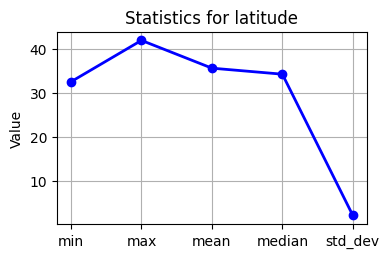

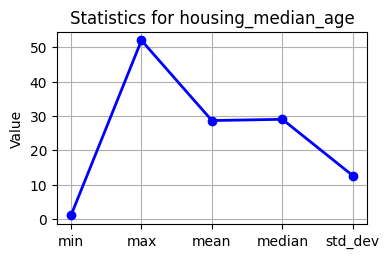

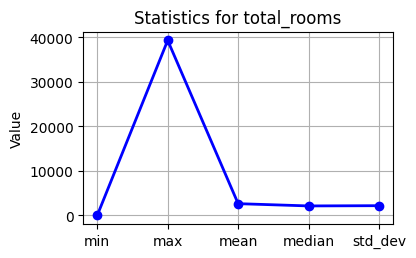

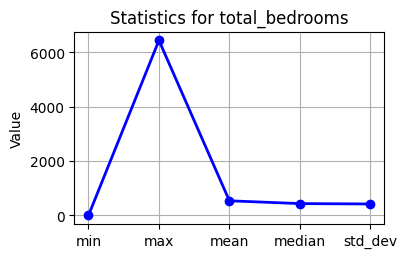

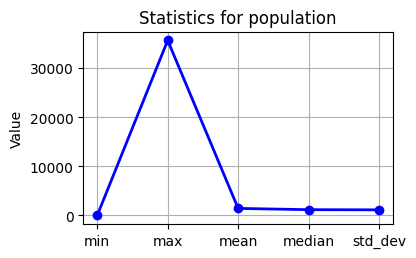

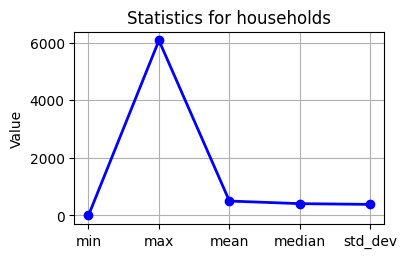

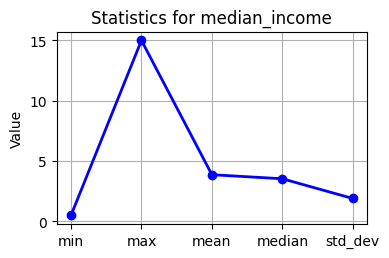

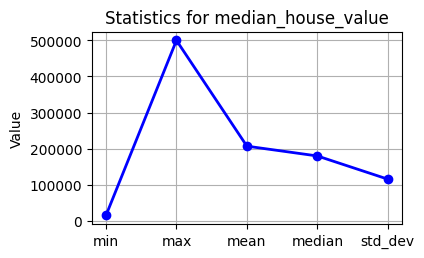

In [8]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        stats = {
            'min': df[col].min(),
            'max': df[col].max(),
            'mean': df[col].mean(),
            'median': df[col].median(),
            'std_dev': df[col].std()
        }

        plt.figure(figsize=(4, 2.5))
        plt.plot(list(stats.keys()), list(stats.values()), marker='o', color='blue', linestyle='-', linewidth=2)
        plt.title(f'Statistics for {col}')
        plt.ylabel('Value')
        plt.grid(True)
        plt.show()

        print("\n");


# ALTERNATIVELY
# plt.plot(df.describe())
# plt.show()

### Task 5 and 6

In [9]:
def fun(col):
    stats = {
        'min': df[col].min(),
        'max': df[col].max(),
        'mean': df[col].mean(),
        'median': df[col].median(),
        'std_dev': df[col].std()
    }
    print("min: ",df[col].min())
    print("max: ",df[col].max())
    print("mean: ",df[col].mean())
    print("median: ",df[col].median())
    print("std_dev: ",df[col].std())
    plt.figure(figsize=(4, 2.5))
    plt.plot(list(stats.keys()), list(stats.values()), marker='o', color='blue', linestyle='-', linewidth=2)
    plt.title(f'Statistics for {col}')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()


In [51]:

print(df.isna().sum()) #if sum is taken, if even one value is missing, its isna() will return True, which when added up with all the other False values, will give True

for col in df.columns:

    if df[col].isna().sum() > 0:
        print("\n"+col)
        print("Before: \n")
        fun(col) #print stats for column before imputing
        df[col].fillna(df[col].median(), inplace=True)
        print("After: \n")
        fun(col) #print stats for column after inputing

# print("\n"+df.isna().sum()) #to confirm that our imputation worked

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
cost_per_sqft         0
dtype: int64


### Task 7

In [52]:
print("Initial number of rows: "+str(df.shape[0]))
has_duplicates = df.duplicated().any()
print(f"Are there any duplicate rows? {has_duplicates}")
duplicatesRemoved=df.copy()
duplicatesRemoved.drop_duplicates()
print("Final number of rows: "+str(duplicatesRemoved.shape[0]))

Initial number of rows: 20640
Are there any duplicate rows? False
Final number of rows: 20640


### Task 8

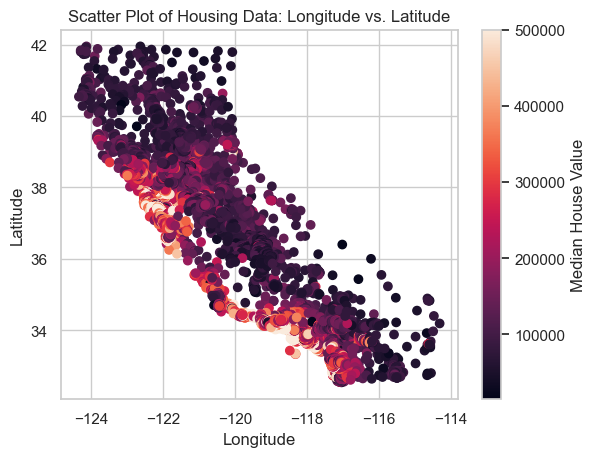

In [58]:
scatterplot = plt.scatter(df['longitude'],df['latitude'],c=df['median_house_value'])

colorbar = plt.colorbar(scatterplot)
colorbar.set_label('Median House Value')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Housing Data: Longitude vs. Latitude')

plt.show()


### Task 9

In [55]:
print(df[df['total_bedrooms'] < 1500].shape[0])
print(df[df['total_bedrooms'] >= 1500].shape[0])

19986
654


There are 19779 entries with total bedrooms value is less than 1500.

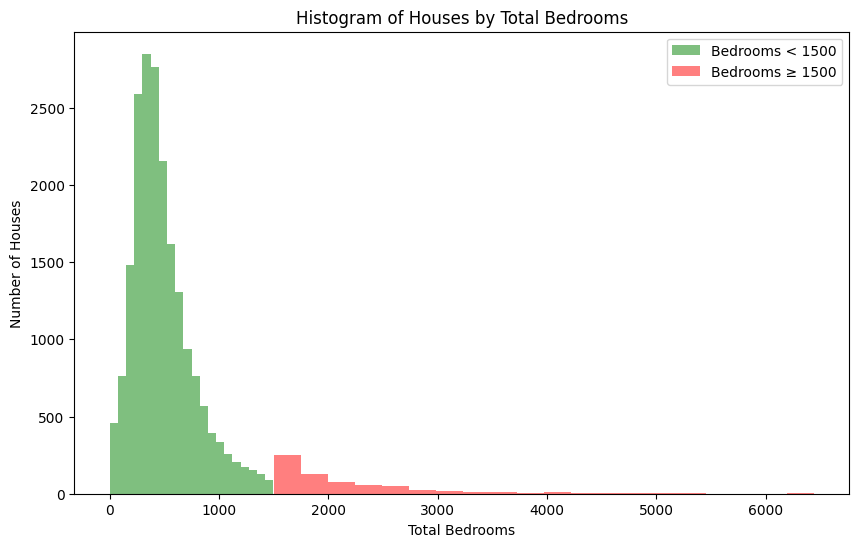

In [14]:
#Plotting number of houses having total bedrooms less than 1500
houses_bedrooms_less_than_1500 = df[df['total_bedrooms'] < 1500]
houses_bedrooms_greater_equal_1500 = df[df['total_bedrooms'] >= 1500]

plt.figure(figsize=(10, 6))

plt.hist(houses_bedrooms_less_than_1500['total_bedrooms'], bins=20, alpha=0.5, label='Bedrooms < 1500', color='green')

plt.hist(houses_bedrooms_greater_equal_1500['total_bedrooms'], bins=20, alpha=0.5, label='Bedrooms ≥ 1500', color='red')

plt.xlabel('Total Bedrooms')
plt.ylabel('Number of Houses')
plt.title('Histogram of Houses by Total Bedrooms')
plt.legend()
plt.show()

Plotting number of houses having median house value > $100000

In [15]:
k=df['median_house_value']
k.mean()

np.float64(206855.81690891474)

In [16]:
#Plotting number of houses having median house value above $100,000
house_value_less_than_100000=df[df['median_house_value'] < 100000]
print(house_value_less_than_100000.shape[0])
house_value_gr_than_100000=df[df['median_house_value'] >= 100000]
print(house_value_gr_than_100000.shape[0])

3596
17044


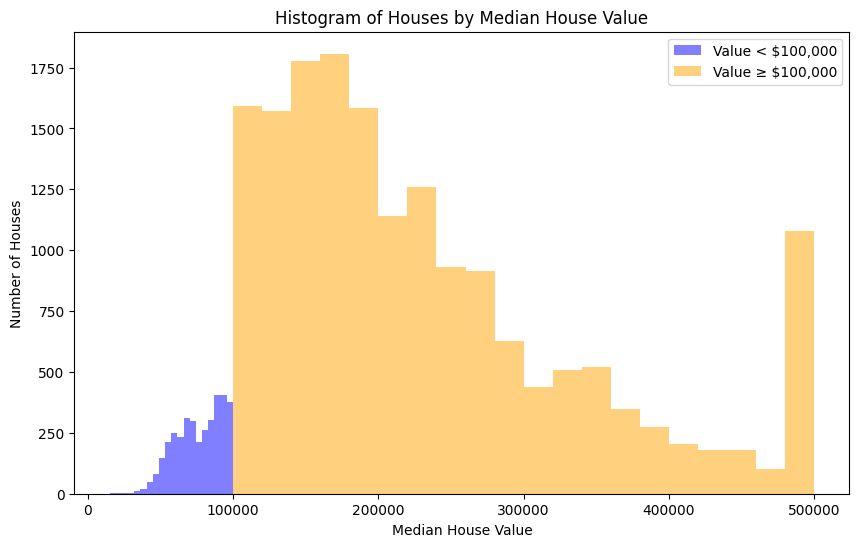

In [17]:
houses_value_less_than_100000 = df[df['median_house_value'] < 100000]
houses_value_greater_equal_100000 = df[df['median_house_value'] >= 100000]

plt.figure(figsize=(10, 6))

plt.hist(houses_value_less_than_100000['median_house_value'], bins=20, alpha=0.5, label='Value < $100,000', color='blue')

plt.hist(houses_value_greater_equal_100000['median_house_value'], bins=20, alpha=0.5, label='Value ≥ $100,000', color='orange')

plt.xlabel('Median House Value')
plt.ylabel('Number of Houses')
plt.title('Histogram of Houses by Median House Value')
plt.legend()
plt.show()

In [18]:
#Number of houses having population less than mean
population_mean=df['population'].mean()
population_mean

np.float64(1425.4767441860465)

In [19]:
houses_population_less_than_mean = df[df['population'] < population_mean]
houses_population_greater_equal_mean = df[df['population'] >= population_mean]
print(houses_population_less_than_mean.shape[0])
print(houses_population_greater_equal_mean.shape[0])

13128
7512


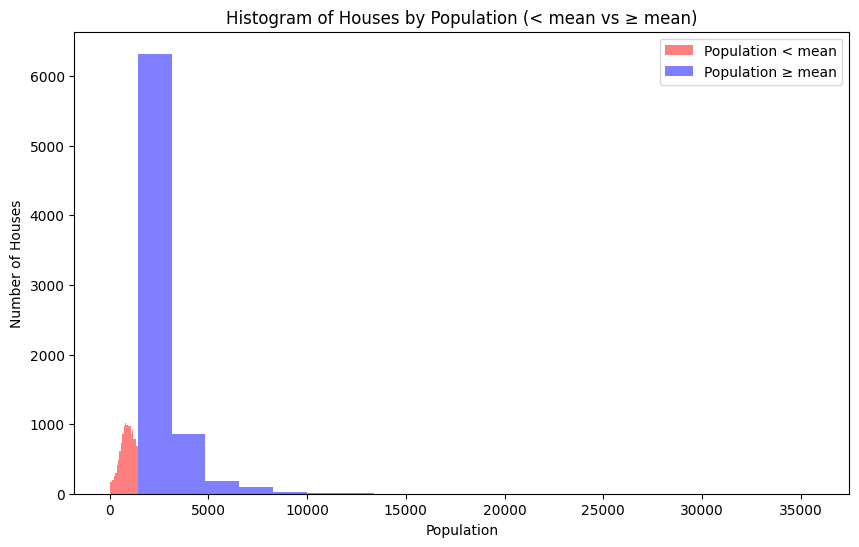

In [20]:
plt.figure(figsize=(10, 6))

plt.hist(houses_population_less_than_mean['population'], bins=20, alpha=0.5, label='Population < mean', color='red')

plt.hist(houses_population_greater_equal_mean['population'], bins=20, alpha=0.5, label='Population ≥ mean', color='blue')

plt.xlabel('Population')
plt.ylabel('Number of Houses')
plt.title('Histogram of Houses by Population (< mean vs ≥ mean)')
plt.legend()
plt.show()

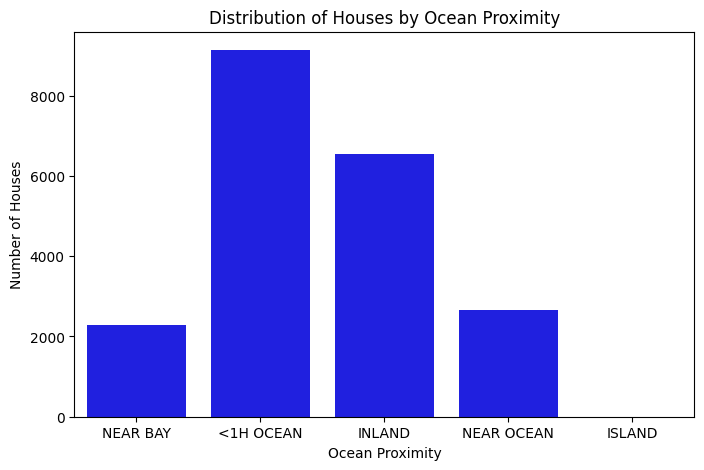

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='ocean_proximity', data=df,color='blue')
plt.title('Distribution of Houses by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Number of Houses')
plt.show()

### Task 10

In [22]:
from sklearn.preprocessing import LabelEncoder

#Grouping the data by ocean_proximity abd calculating summary statistics for each group
grouped = df.groupby('ocean_proximity').describe()
print(grouped)

                longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude             ... median_income  \
                      75%     max    count       mean  ...           75%   
ocean_proximity                                        ...                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  ...      5.180500   
INLAND          -117.8400 -114.31   6551.0  36.731829  ...      3.961500   
ISLAND     

In [60]:
#Encoding categorical ocean_proximity values into numerical representations for potential modeling purposes
ocean_proximity_le = LabelEncoder()
df['ocean_proximity'] = ocean_proximity_le.fit_transform(df['ocean_proximity'])

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3,514.318182
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3,50.500070
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3,240.013633
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3,267.896389
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3,210.325753


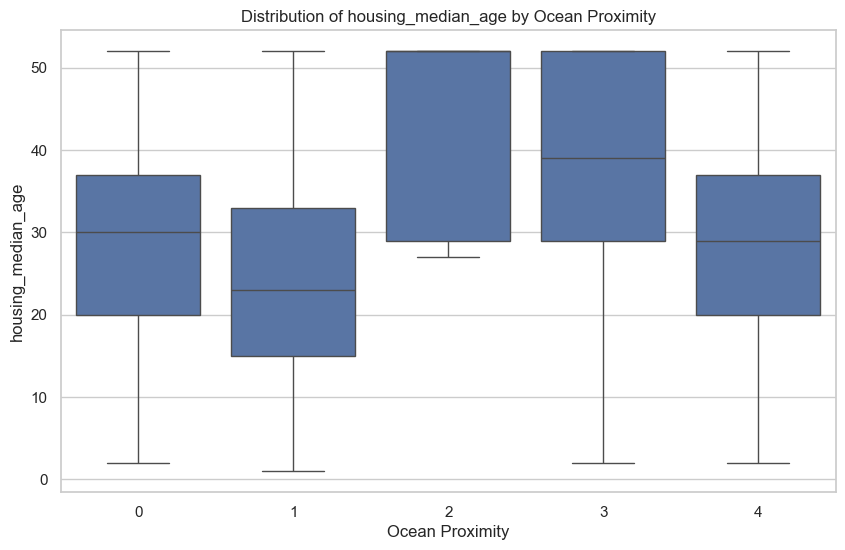

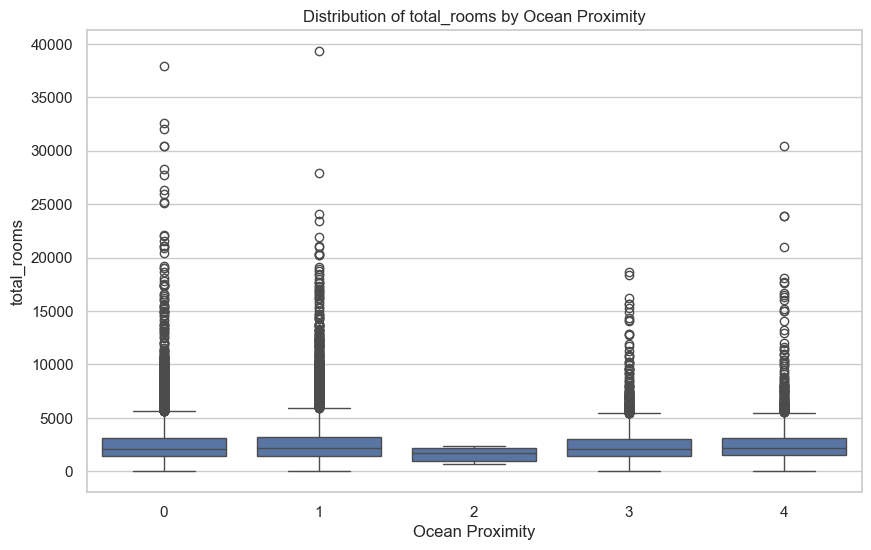

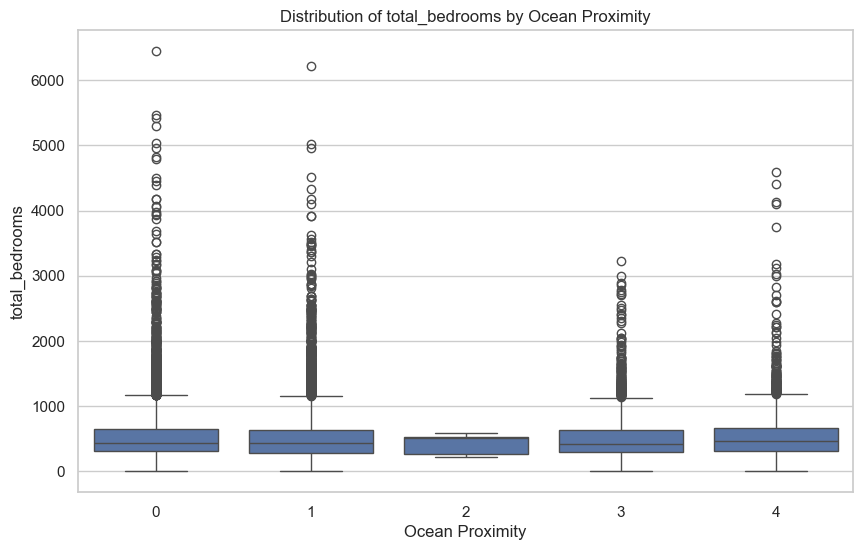

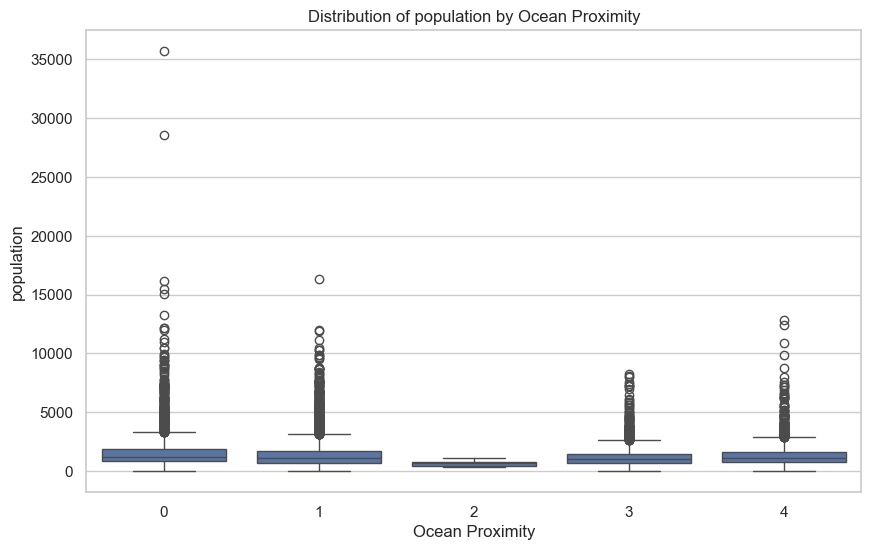

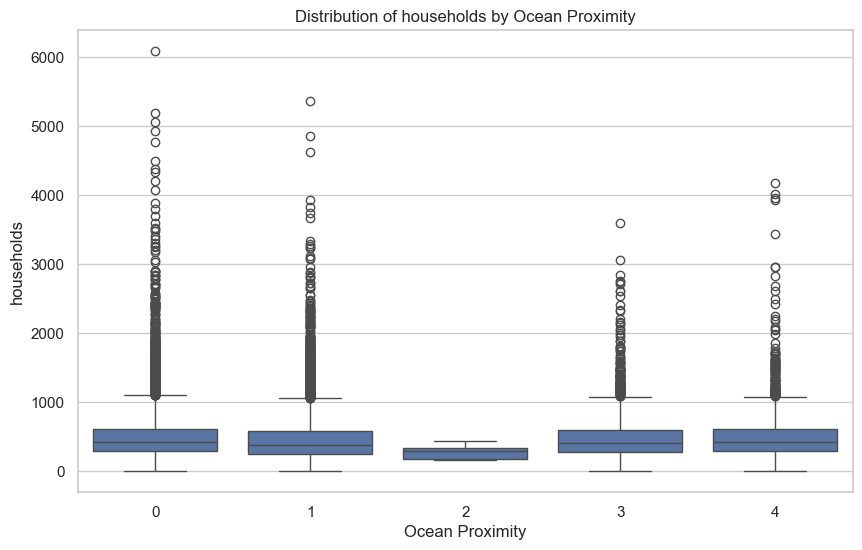

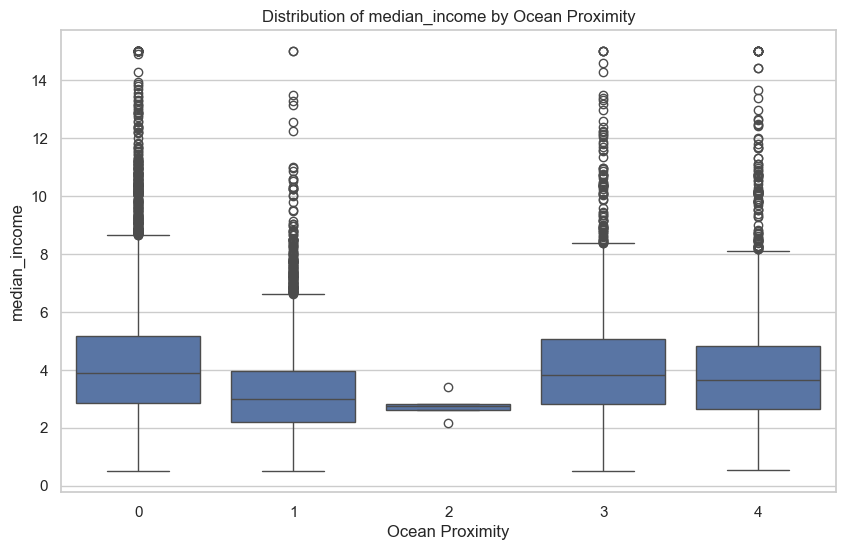

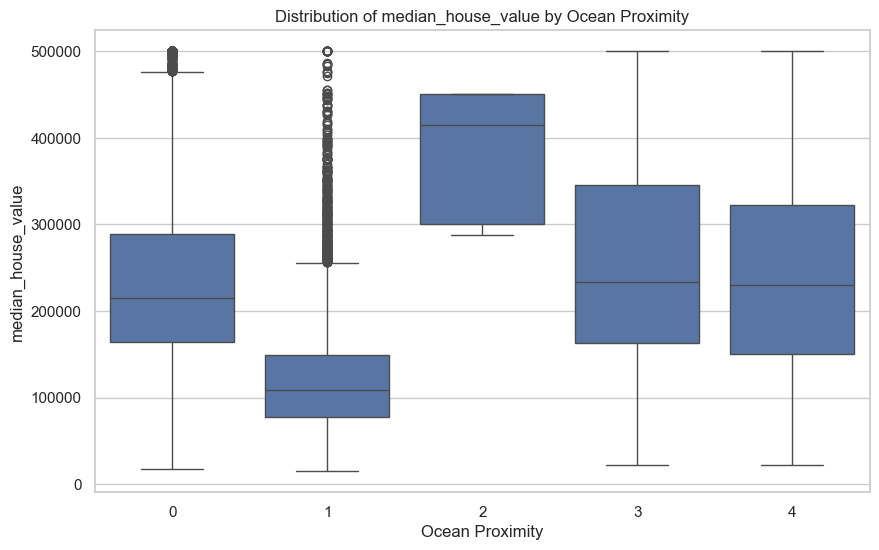

In [61]:
#Visualizing the distribution of a different target variables across different ocean_proximity categories.
sns.set(style="whitegrid")

numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income', 'median_house_value']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ocean_proximity', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Ocean Proximity')
    plt.xlabel('Ocean Proximity')
    plt.ylabel(feature)
    plt.xticks(ticks=range(len(ocean_proximity_le.classes_)), labels=ocean_proximity_le.classes_)
    plt.show()

### Task 11

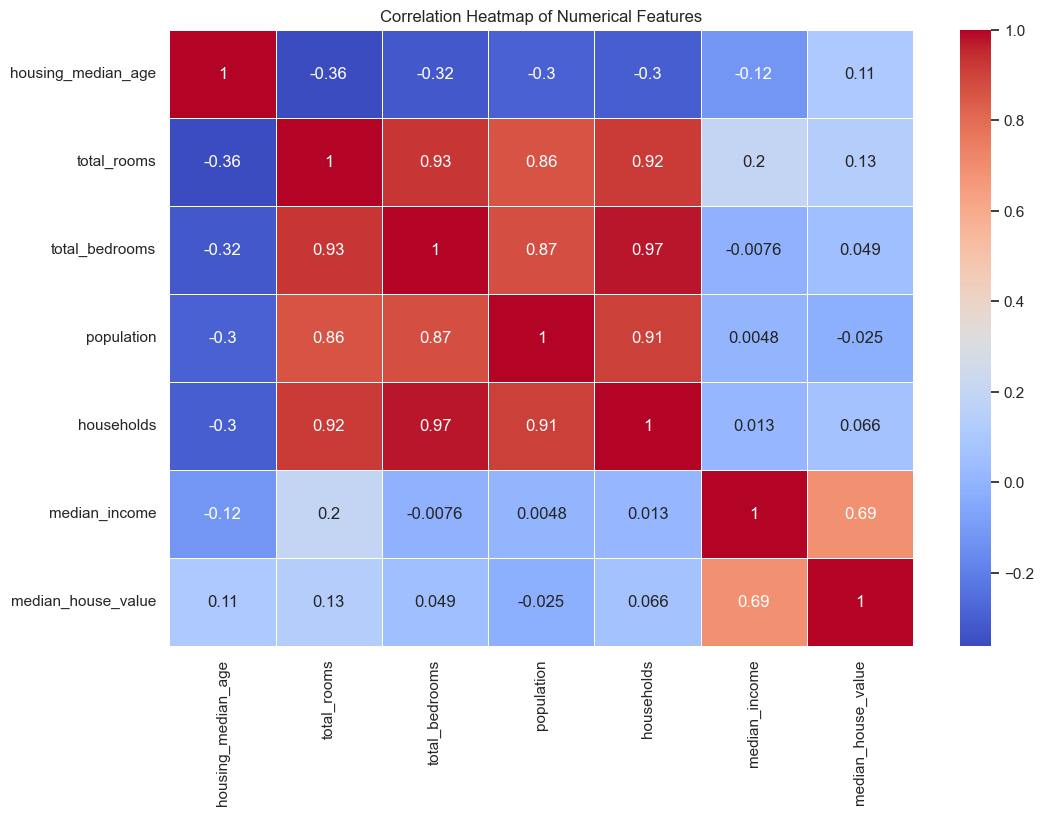

In [25]:
#Creating a correlation heatmap of the dataset to identify relationships between numerical features
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income', 'median_house_value']

correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

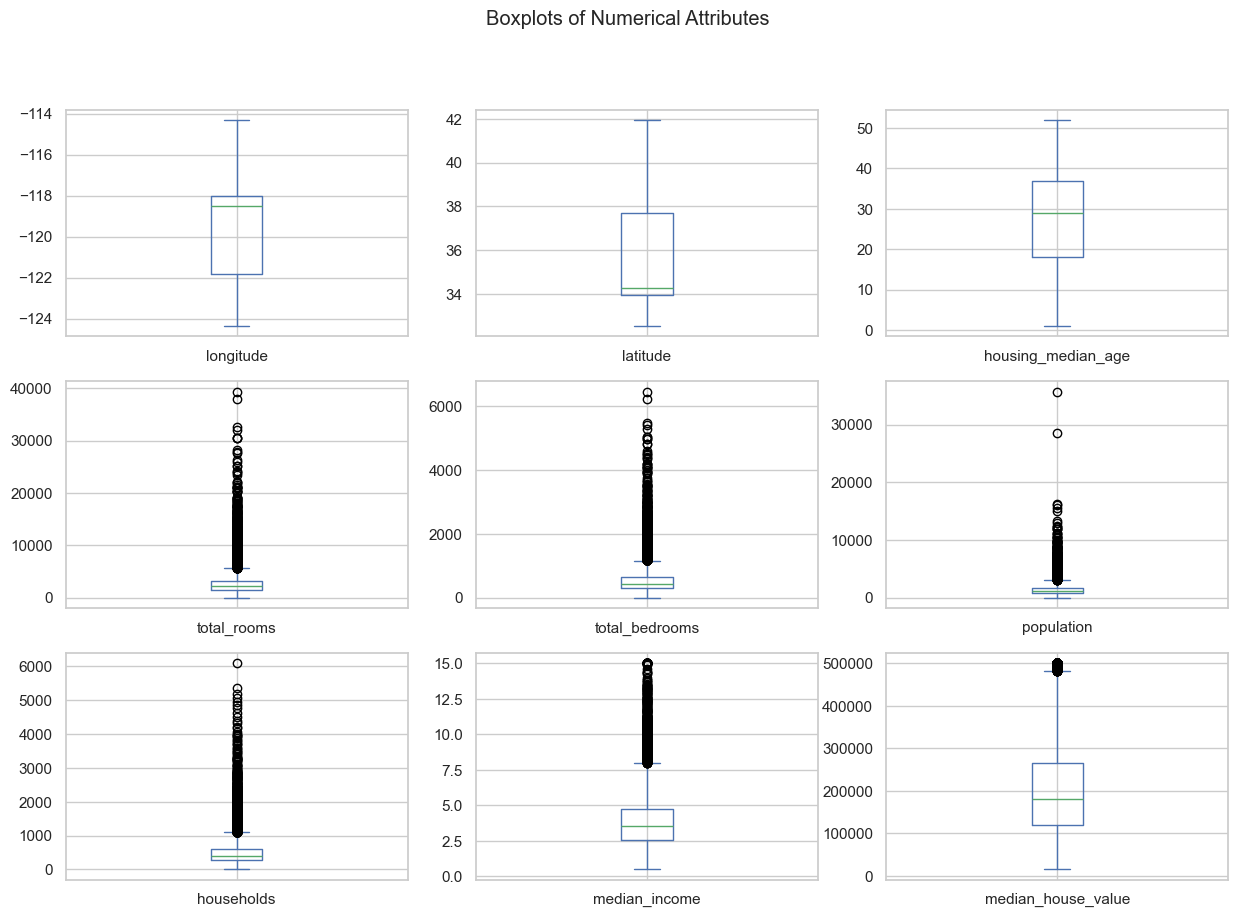

In [26]:
#Box plots for all numerical features to visualize their distribution and potential outliers
numerical_columns = ['longitude', 'latitude', 'housing_median_age',
                     'total_rooms', 'total_bedrooms', 'population',
                     'households', 'median_income', 'median_house_value']

df[numerical_columns].plot(kind='box', subplots=True, layout=(3,3), figsize=(15, 10))

plt.suptitle('Boxplots of Numerical Attributes')
plt.show()

#Drawing Insights from heatmap and boxplots

The following features have **strong correlation** with each other:

•	*total_rooms and total_bedrooms*

•	*total_rooms and households*

•	*total_rooms and population*

•	*total_bedrooms and population*

•	*total_bedrooms and households*

•	*population and households*

•	*median_income and median_house_value*





**Outlier Detection:**

**Total Rooms, Total Bedrooms, Population, and Households:**

These attributes have a significant number of outliers, as indicated by the many points above the upper area of the boxplot.

**Median Income:**

The distribution of median income seems to be broader, indicating more variability in income levels among the households.

**Median House Value:**

Outliers: There are also outliers present in the median house value, though the number is relatively fewer compared to attributes like total rooms or population.

*Taking the target variable as **median_house_value**, we get the **feature importance** as follows:*

**Median Income (0.69):** This has the highest positive correlation with
median_house_value, suggesting it is the most important feature.

**Total Rooms (0.13):** This has a small positive correlation with median_house_value, indicating moderate importance.

**Housing Median Age (0.11)**: This also has a small positive correlation with median_house_value.

**Households (0.066)**: Slight positive correlation, indicating it might have some relevance.

**Total Bedrooms (0.05)**: Very small positive correlation, suggesting low importance.

**Population (-0.025)**: Near-zero correlation, indicating it is not very important.

In [27]:
df['cost_per_sqft'] = df['median_house_value'] / df['total_rooms']

In [28]:
threshold = df['median_house_value'].quantile(0.90)

premium_houses = df[df['median_house_value'] > threshold]
print(premium_houses.shape[0])
premium_houses.head()

2063


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3,514.318182
89,-122.27,37.80,52,249,78.0,396,85,1.2434,500001,3,2008.036145
123,-122.24,37.84,52,3529,574.0,1177,555,5.1773,389500,3,110.371210
124,-122.24,37.85,52,2612,365.0,901,367,7.2354,391100,3,149.732006
128,-122.21,37.83,40,4991,674.0,1616,654,7.5544,411500,3,82.448407


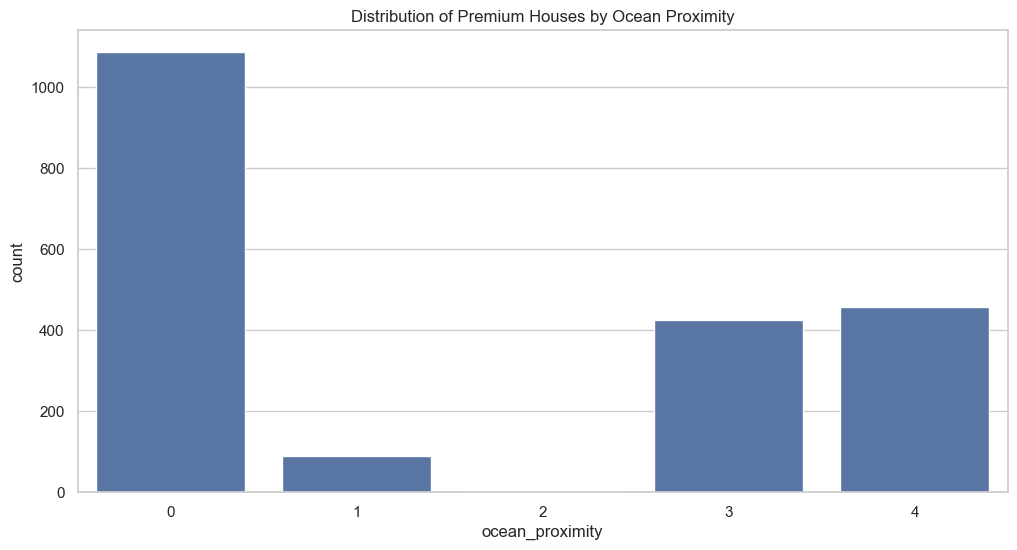

In [29]:
# Plotting the distribution of premium houses based on ocean proximity
plt.figure(figsize=(12, 6))
sns.countplot(data=premium_houses, x='ocean_proximity')
plt.title('Distribution of Premium Houses by Ocean Proximity')
plt.show()

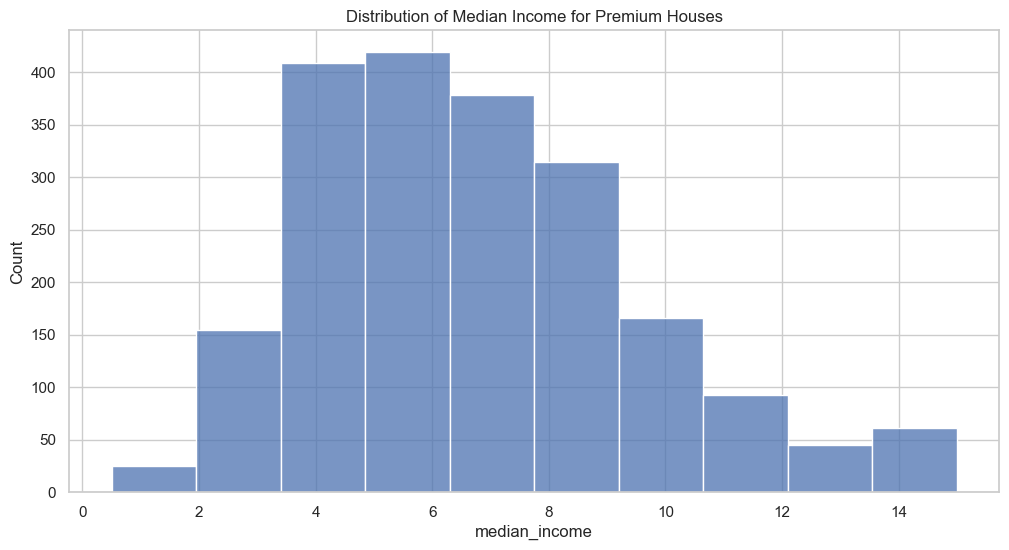

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(data=premium_houses, x='median_income', bins=10)
plt.title('Distribution of Median Income for Premium Houses')
plt.show()

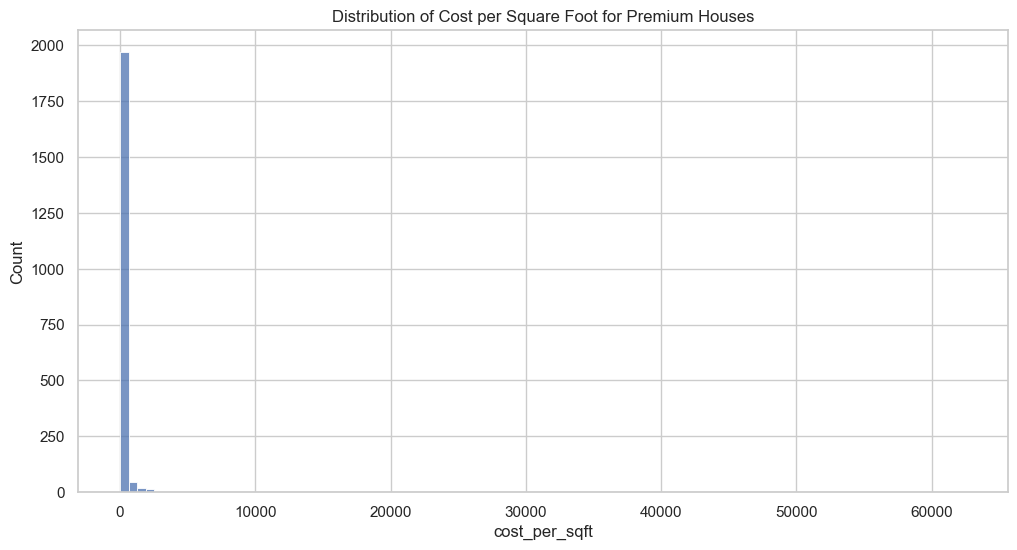

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(data=premium_houses, x='cost_per_sqft', bins=100)
plt.title('Distribution of Cost per Square Foot for Premium Houses')
plt.show()

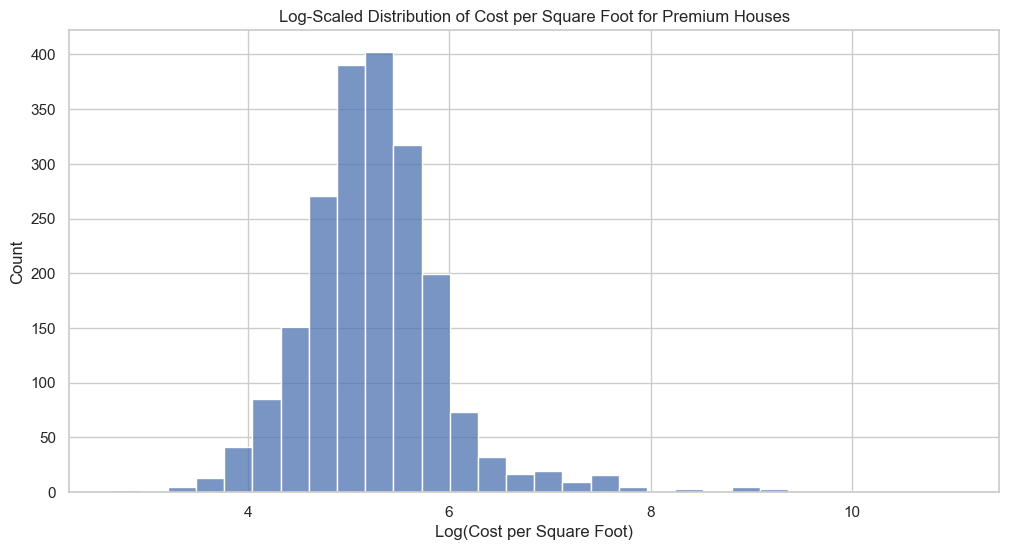

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(data=np.log1p(premium_houses['cost_per_sqft']), bins=30)
plt.title('Log-Scaled Distribution of Cost per Square Foot for Premium Houses')
plt.xlabel('Log(Cost per Square Foot)')
plt.show()

### Task 12

In [33]:
# Task 12
def visualize_col(col):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    sns.kdeplot(df[col], ax=axes[0])
    axes[0].set_title(f'KDE of {col}')

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    sns.scatterplot(x=df[col], y=df['median_house_value'], ax=axes[2])
    axes[2].set_title(f'Scatterplot of {col} vs median_house_value')

    plt.tight_layout()
    plt.show()

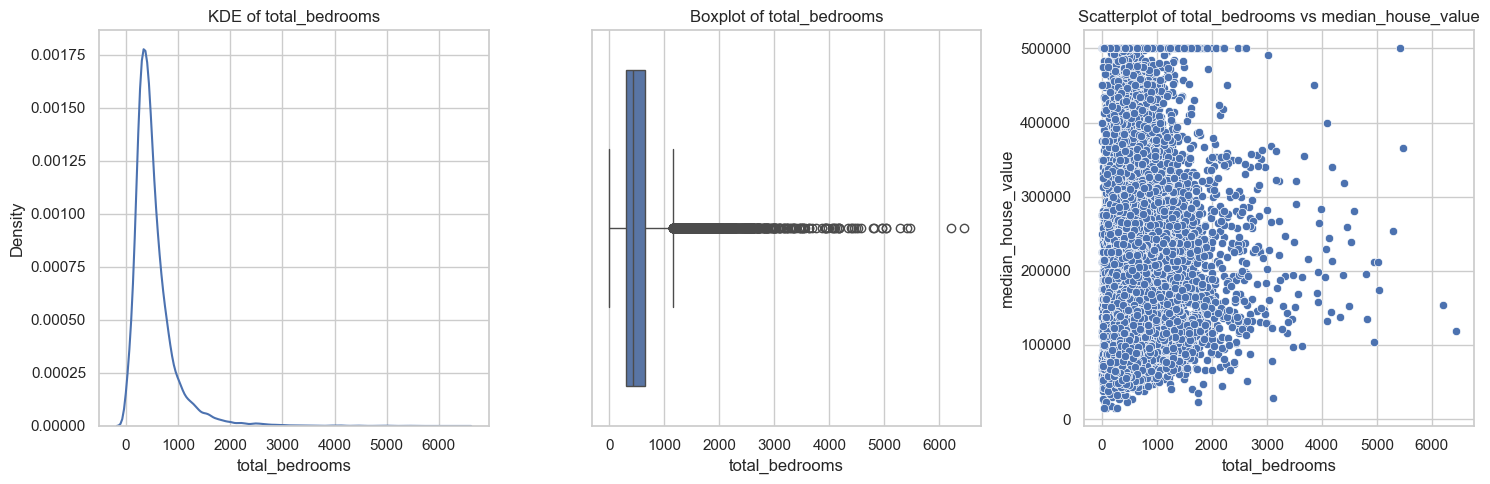

In [34]:
visualize_col('total_bedrooms')

### Task 13

In [35]:
# Task 13
def visualize_outlier(col):
    mean = df[col].mean()
    std_dev = df[col].std()

    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f'Total number of outliers in {col}: {outliers.shape[0]}')

    plt.figure(figsize=(12, 5))
    sns.histplot(df[col], bins=45)

    plt.axvspan(df[col].min(), lower_bound, color='red', alpha=0.3)
    plt.axvspan(upper_bound, df[col].max(), color='red', alpha=0.3)

    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.show()


Total number of outliers in median_house_value: 1383


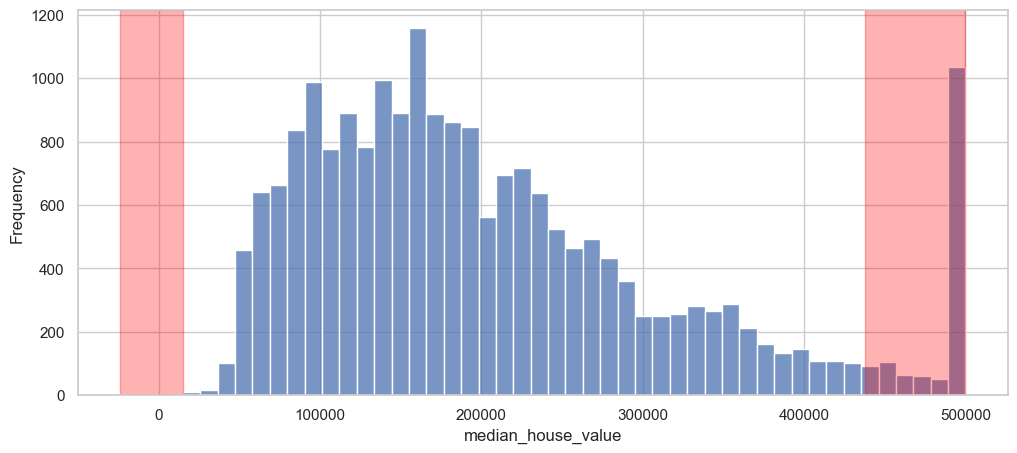

In [36]:
visualize_outlier('median_house_value')

### Task 14

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features=df.select_dtypes(include=[np.number]).columns
print(numerical_features)

def scaler(df, numerical_features, scaler):
    scaled_df = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)
    return scaled_df

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'cost_per_sqft'],
      dtype='object')


In [38]:
# Standard Scaler
df_standard_scaled = scaler(df, numerical_features, StandardScaler())
df_standard_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,1.291089,0.429314
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,1.291089,-0.125353
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.291089,0.101281
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,1.291089,0.134625
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,1.291089,0.065778


In [39]:
print("StandardScaler ranges:")
df_standard_scaled.describe().loc[['min', 'max']]

StandardScaler ranges:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
min,-2.385992,-1.447568,-2.196180,-1.207283,-1.277688,-1.256123,-1.303984,-1.774299,-1.662641,-0.820653,-0.183837
max,2.625280,2.958068,1.856182,16.815580,14.087789,30.250330,14.601520,5.858286,2.540411,1.995003,82.030476


In [40]:
# MinMax Scaler
df_minmax_scaled = scaler(df, numerical_features, MinMaxScaler())
df_minmax_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.75,0.007458
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.75,0.000711
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.75,0.003468
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.75,0.003874
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.75,0.003036


In [41]:
print("MinMaxScaler ranges:")
df_minmax_scaled.describe().loc[['min', 'max']]

MinMaxScaler ranges:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [42]:
from sklearn.preprocessing import RobustScaler,QuantileTransformer,PowerTransformer

# Robust Scaler
df_robust_scaled = scaler(df, numerical_features, RobustScaler())
df_robust_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
0,-0.986807,0.957672,0.631579,-0.733422,-0.883755,-0.899787,-0.870769,2.197582,1.880448,2.0,4.770371
1,-0.984169,0.952381,-0.421053,2.924276,1.937906,1.316631,2.243077,2.186664,1.232041,2.0,-0.378090
2,-0.989446,0.949735,1.210526,-0.388178,-0.707581,-0.714286,-0.713846,1.707732,1.187941,2.0,1.725543
3,-0.992084,0.949735,1.210526,-0.501691,-0.577617,-0.648188,-0.584615,0.967177,1.113523,2.0,2.035047
4,-0.992084,0.949735,1.210526,-0.294074,-0.447653,-0.640725,-0.461538,0.142854,1.119724,2.0,1.396003


In [43]:
print("RobustScaler ranges:")
df_robust_scaled.describe().loc[['min', 'max']]

RobustScaler ranges:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
min,-1.546174,-0.455026,-1.473684,-1.249816,-1.253430,-1.239872,-1.255385,-1.392252,-1.134891,-1.0,-0.920940
max,1.102902,2.034392,1.210526,21.875018,17.357401,36.797441,17.455385,5.259674,2.207070,3.0,762.198189


In [44]:
# Quantile Transformer
df_quantile_scaled = scaler(df, numerical_features, QuantileTransformer())
df_quantile_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
0,0.123624,0.821321,0.822322,0.085085,0.041542,0.042843,0.047047,0.970278,0.939289,0.815315,0.977253
1,0.127127,0.817317,0.312312,0.965084,0.928035,0.882953,0.945484,0.970042,0.883304,0.815315,0.255451
2,0.120120,0.814314,1.000000,0.251251,0.086587,0.090424,0.088589,0.945483,0.876877,0.815315,0.914593
3,0.116116,0.814314,1.000000,0.188188,0.141141,0.115605,0.140140,0.860994,0.861862,0.815315,0.930094
4,0.116116,0.814314,1.000000,0.314836,0.214715,0.118118,0.205706,0.574999,0.863155,0.815315,0.885822


In [45]:
print("QuantileTransformer ranges:")
df_quantile_scaled.describe().loc[['min', 'max']]

QuantileTransformer ranges:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [46]:
# Power Transformer
df_power_scaled = scaler(df, numerical_features, PowerTransformer())
df_power_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
0,-2.414735e-15,1.089037,0.975968,-1.158227,-1.580388,-1.619967,-1.521093,1.903289,1.718078,1.290343,1.929870
1,-2.414735e-15,1.082404,-0.568893,1.896146,1.444601,1.090355,1.633844,1.897081,1.262941,1.290343,-0.604116
2,-2.414735e-15,1.079079,1.761010,-0.534616,-1.135766,-1.139853,-1.136367,1.604361,1.228314,1.290343,1.205336
3,-2.414735e-15,1.079079,1.761010,-0.713802,-0.874893,-1.000270,-0.878626,1.051321,1.168611,1.290343,1.315831
4,-2.414735e-15,1.079079,1.761010,-0.399535,-0.650433,-0.985268,-0.665985,0.205878,1.173649,1.290343,1.069786


In [47]:
print("PowerTransformer ranges:")
df_power_scaled.describe().loc[['min', 'max']]

PowerTransformer ranges:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cost_per_sqft
min,-4.024558e-15,-1.815994,-2.495561,-4.907908,-4.615094,-4.528522,-4.403335,-3.446085,-3.780890,-1.037419,-5.886913
max,5.717649e-15,2.081529,1.761010,5.684875,5.243342,7.450619,5.439466,3.146572,1.916642,1.505310,4.841905


**StandardScaler:**
- Centers the data to have a mean of 0 and a standard deviation of 1.
- Useful when the data follows a Gaussian distribution.
- Drawback: Sensitive to outliers.

**MinMaxScaler:**
- Scales the data to a fixed range, usually [0, 1].
- Useful when the data does not follow a Gaussian distribution.
- Drawback: Sensitive to outliers.

**RobustScaler:**
- Scales the data using statistics that are robust to outliers (median and IQR).
- Useful when the data contains outliers.

**QuantileTransformer:**
- Transforms the data to follow a uniform or normal distribution.
- Useful for non-Gaussian data.
- Drawback: Can distort correlations between features.

**PowerTransformer:**
- Applies a power transformation to make the data more Gaussian-like.
- Useful for positive data with skewed distributions.
- Drawback: Requires positive data.
